In [1]:
#from google.colab import drive
#drive.mount("/content/drive")

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # l|inear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Imports 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import sklearn
import random
import tensorflow as tf
import os
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2021-07-28 10:23:19.682517: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [7]:
# base_path and labels.
base_path = '/home/ccc/Documents/NewCov'
labels = ['Covid', 'Normal']

In [8]:
# Constants
IMAGE_SIZE = 224
BATCH_SIZE = 32
VERBOSE = 1

In [9]:
# Dataset from the training folder.
x_train=[]
y_train=[]
for i in labels:
    folderPath = os.path.join(os.path.join(base_path,'Train'),i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
        x_train.append(img)
        y_train.append(i)
print('Training dataset Loading complete.')

# Dataset from the testing folder..

for i in labels:
    folderPath = os.path.join(os.path.join(base_path,'Test'),i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
        x_train.append(img)
        y_train.append(i)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train, y_train = sklearn.utils.shuffle(x_train, y_train, random_state=0)

print('Testing dataset Loading complete.')

  3%|▎         | 2/76 [00:00<00:05, 12.75it/s]

Training dataset Loading complete.


100%|██████████| 76/76 [00:01<00:00, 38.22it/s]


Testing dataset Loading complete.


/home/ccc/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


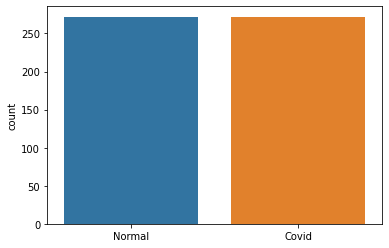

In [10]:
sns.countplot(y_train)
plt.show()

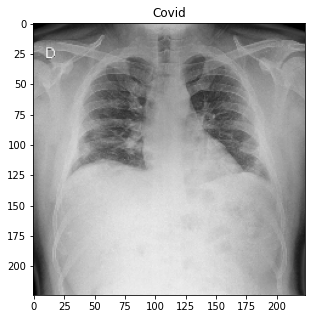

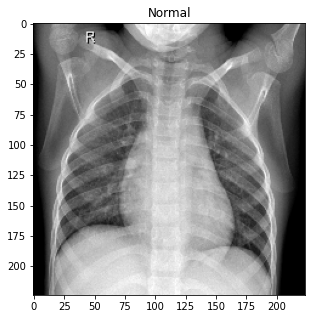

In [11]:
j=0
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            plt.figure(figsize = (5,5))
            plt.imshow(x_train[j])
            plt.title(y_train[j])
            break
        j+=1

In [12]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True, vertical_flip=False
)

datagen.fit(x_train)
x_train.shape

(544, 224, 224, 3)

In [13]:
# Splitting of dataset for Testing.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.10, random_state=0)

print("Shapes X : Train :",x_train.shape,  " Test :",x_test.shape)
print("Shapes Y : Train :",y_train.shape,  " Test :",y_test.shape)

Shapes X : Train : (489, 224, 224, 3)  Test : (55, 224, 224, 3)
Shapes Y : Train : (489,)  Test : (55,)


In [14]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [15]:
#import tensorflow as tf
#tf.keras.applications.vgg16.preprocess_input

In [16]:
import tensorflow as tf
tf.keras.applications.resnet.preprocess_input

<function tensorflow.python.keras.applications.resnet.preprocess_input(x, data_format=None)>

In [17]:
# Importing the model and initializing.
from tensorflow.keras.applications import ResNet50
resnet = ResNet50(weights = 'imagenet',include_top=False,input_shape=(IMAGE_SIZE,IMAGE_SIZE, 3))

2021-07-28 10:24:39.285713: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-28 10:24:39.355365: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-28 10:24:39.356091: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce 930A computeCapability: 5.0
coreClock: 0.98GHz coreCount: 3 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 11.92GiB/s
2021-07-28 10:24:39.356183: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-28 10:24:39.775279: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-07-28 10:24:39.775431: I tensorflow/stream_executor/platform/default/

In [18]:
# Adding Top Layers.
model1 = resnet.output
model1 = tf.keras.layers.GlobalAveragePooling2D()(model1)
model1 = tf.keras.layers.Dropout(0.5)(model1)
model1 = tf.keras.layers.Dense(2, activation = 'softmax')(model1)
model1 = tf.keras.models.Model(inputs = resnet.input, outputs = model1)

# Model summary.
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [19]:
# Compiling Model
model1.compile(loss = 'categorical_crossentropy', optimizer ='Adam', metrics=['accuracy'])
# Callbacks.
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("resnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,mode='auto',verbose=VERBOSE)

2021-07-28 10:25:09.702531: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-28 10:25:09.702646: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-07-28 10:25:09.789523: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1611] Profiler found 1 GPUs
2021-07-28 10:25:09.790536: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory
2021-07-28 10:25:10.098513: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcupti.so
2021-07-28 10:25:10.309935: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-28 10:25:10.310357: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1743] CUPTI activity buffer flushed


In [ ]:
# Fitting the model
history1 = model1.fit(x_train, y_train, validation_split=0.1, epochs = 10, verbose =VERBOSE, batch_size=BATCH_SIZE, callbacks=[tensorboard,checkpoint,reduce_lr])

/home/ccc/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
2021-07-28 10:25:21.463626: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-28 10:25:21.513860: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2899885000 Hz


Epoch 1/10


2021-07-28 10:25:26.272277: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 102760448 exceeds 10% of free system memory.
2021-07-28 10:25:26.630733: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 102760448 exceeds 10% of free system memory.
2021-07-28 10:25:26.742534: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 106463232 exceeds 10% of free system memory.
2021-07-28 10:25:26.782810: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 102760448 exceeds 10% of free system memory.
2021-07-28 10:25:26.847591: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 102760448 exceeds 10% of free system memory.


 1/14 [=>............................] - ETA: 3:44 - loss: 0.7853 - accuracy: 0.6562

2021-07-28 10:25:39.206738: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-07-28 10:25:39.206772: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.


 2/14 [===>..........................] - ETA: 2:11 - loss: 0.4766 - accuracy: 0.7969

2021-07-28 10:25:50.035541: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-07-28 10:25:50.036085: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1743] CUPTI activity buffer flushed
2021-07-28 10:25:50.195714: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-07-28 10:25:50.252066: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-07-28 10:25:50.326337: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/train/plugins/profile/2021_07_28_10_25_50
2021-07-28 10:25:50.345616: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2021_07_28_10_25_50/ccc.trace.json.gz
2021-07-28 10:25:50.425523: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/train/plugins/profile/20

14/14 [==============================] - 173s 12s/step - loss: 0.2345 - accuracy: 0.9409 - val_loss: 768.9025 - val_accuracy: 0.4898

Epoch 00001: val_accuracy improved from -inf to 0.48980, saving model to resnet.h5
Epoch 2/10
14/14 [==============================] - 159s 11s/step - loss: 0.0689 - accuracy: 0.9932 - val_loss: 4833.3706 - val_accuracy: 0.4898

Epoch 00002: val_accuracy did not improve from 0.48980
Epoch 3/10
14/14 [==============================] - 167s 12s/step - loss: 0.1606 - accuracy: 0.9818 - val_loss: 497.8186 - val_accuracy: 0.5102

Epoch 00003: val_accuracy improved from 0.48980 to 0.51020, saving model to resnet.h5
Epoch 4/10
14/14 [==============================] - 175s 13s/step - loss: 0.0571 - accuracy: 0.9886 - val_loss: 26811.5098 - val_accuracy: 0.4898

Epoch 00004: val_accuracy did not improve from 0.51020
Epoch 5/10
14/14 [==============================] - 172s 12s/step - loss: 0.0227 - accuracy: 0.9909 - val_loss: 8630.6904 - val_accuracy: 0.4898

Epo

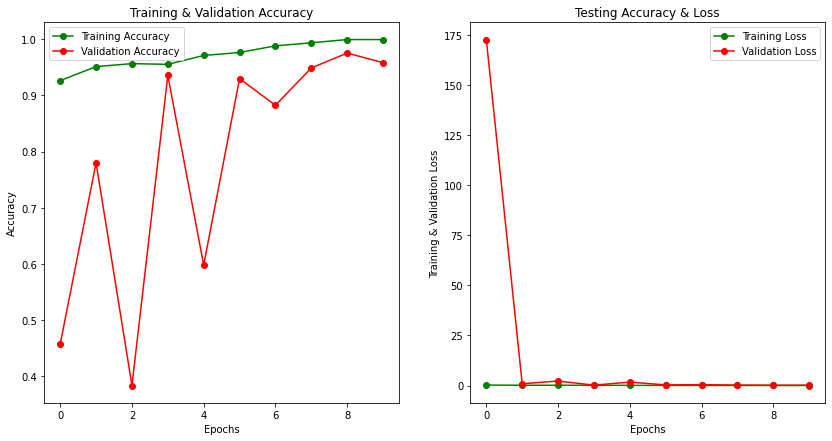

In [ ]:
epochs = [i for i in range(10)]
fig, ax = plt.subplots(1,2)
train_acc = history1.history['accuracy']
train_loss = history1.history['loss']
val_acc = history1.history['val_accuracy']
val_loss = history1.history['val_loss']
fig.set_size_inches(14, 7)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss, 'g-o', label ='Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')
plt.show()

In [ ]:
# Evaluating Model.
result1=model1.evaluate(x_test, y_test)
print("Testing Loss :", result1[0])
print("Testing Accuracy :", result1[1]*100, "%")

19/19 [==============================] - 2s 116ms/step - loss: 0.1386 - accuracy: 0.9556
Testing Loss : 0.13856537640094757
Testing Accuracy : 95.55555582046509 %


In [ ]:
predictions1 = model1.predict(x_test)
predictions1 = np.argmax(predictions1, axis = 1)
y_test_edit = np.argmax(y_test , axis = 1)

In [ ]:
# Classification report.
cf_report = sklearn.metrics.classification_report(y_test_edit, predictions1 )
print(cf_report)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       423
           1       0.88      0.98      0.92       162

    accuracy                           0.96       585
   macro avg       0.93      0.96      0.95       585
weighted avg       0.96      0.96      0.96       585



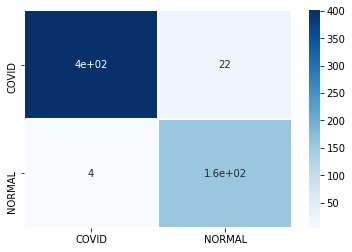

In [ ]:
cf_matrix = sklearn.metrics.confusion_matrix(y_test_edit, predictions1)
sns.heatmap(cf_matrix, cmap = 'Blues', linewidth = 1, annot = True, xticklabels=labels, yticklabels=labels)